# Sales Prediction -- Linear Regression
 

#### Problem Statement: 
Build a model which predicts sales based on the money spent on different platforms for marketing.

In [21]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# this allows plots to appear directly in the notebook
%matplotlib inline

In [4]:
# read data into a DataFrame
data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# print the shape of the DataFrame
data.shape

(200, 4)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


### What are the features?

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper

### What is the response?

- **Sales**: sales of a single product in a given market (in thousands of items)

### What else do we know?

Because the response variable is continuous, this is a regression problem.
There are 200 observations (represented by the rows), and each observation is a single market.

In [19]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


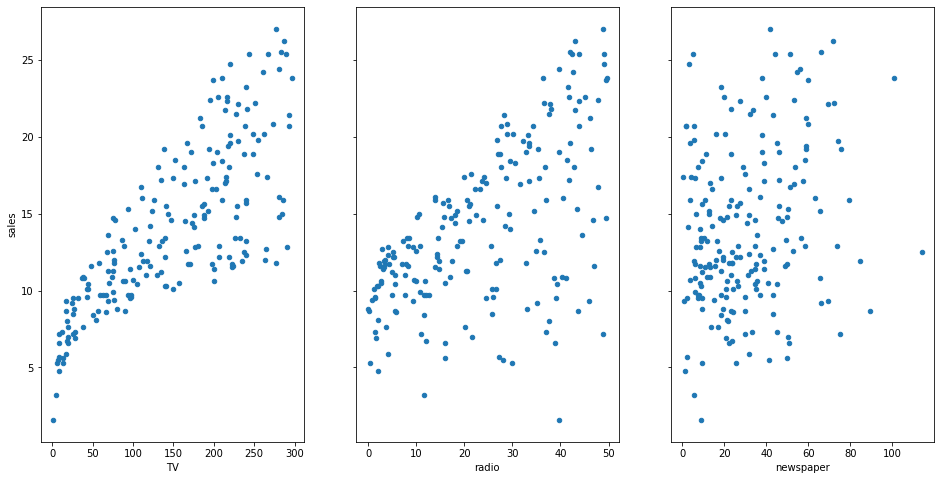

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

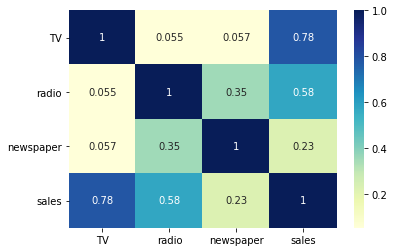

In [22]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Form of linear regression

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$
- y  is the response
- β0  is the intercept
- β1  is the coefficient for  x1  (the first feature)
- βn  is the coefficient for  xn  (the nth feature)

In this case:

$$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$$
The  β  values are called the model coefficients

These values are "learned" during the model fitting step using the "least squares" criterion
Then, the fitted model can be used to make predictions

In [24]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [25]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [27]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [28]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [41]:
# import  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## Linear regression in scikit-learn

In [43]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [45]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$ 
## How do we interpret the TV coefficient?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

Important notes:

- This is a statement of association, not causation
- If an increase in TV ad spending was associated with a decrease in sales,  β1  would be negative.

In [46]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

## We need an evaluation metric in order to compare our predictions with the actual values.

Model evaluation metrics for regression

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [48]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

### Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [49]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


### Mean Squared Error (MSE) is the mean of the squared errors:
$$ \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [50]:
# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [51]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
Easier to put in context as it's the same units as our response variable

## Computing the RMSE for our Sales predictions¶


In [53]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


## Feature selection
Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [58]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


In [59]:
print(linreg.intercept_)
print(linreg.coef_)

2.9272373202664816
[0.04660234 0.18117959]


In [60]:
# create a Python list of feature names
feature_cols = ['TV']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542


In [61]:
print(linreg.intercept_)
print(linreg.coef_)

6.91197261886872
[0.04802945]


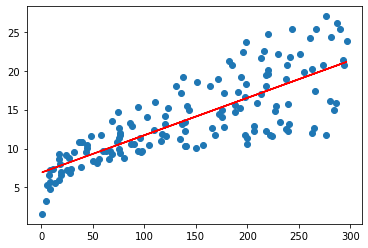

In [62]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.911 + 0.048*X_train, 'r')
plt.show()